# Binary Classification of Dengue/Chikungunya Symptoms with Logistic Regression

- Simple algorithm, a test run of a possible classification project of dengue/chikungunya based on the different symptoms and combinations of symptoms of each disease. Decision Tree in this case.
- Data on Dengue and Chikungunya from SINAN-2024


In [1]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ML libraries and functions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
import graphviz 
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
# Loading the data 

df_dengue = pd.read_csv('dengue_SP.csv')
df_chik = pd.read_csv('chik_SP.csv')

In [3]:
# Visualizing the data, making sure of the possible values
df_dengue.describe()

,CRITERIO,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO
count,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06,1.767186e+06
mean,1.525112e+00,1.135946e+00,1.220604e+00,1.206035e+00,1.909500e+00,1.740793e+00,1.564364e+00,1.669362e+00,1.962446e+00,1.903149e+00,1.870194e+00,1.941132e+00,1.957934e+00,1.960215e+00,1.698508e+00
std,5.130969e-01,3.427308e-01,4.146539e-01,4.044560e-01,2.868966e-01,4.381995e-01,4.958401e-01,4.704431e-01,1.901151e-01,2.957543e-01,3.360898e-01,2.353768e-01,2.007392e-01,1.954531e-01,4.589061e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
75%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
max,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


In [4]:
# Removing the cases under investigation
df_dengue = df_dengue[df_dengue['CRITERIO'] != 3]
df_chik = df_chik[df_chik['CRITERIO'] != 3]

In [5]:
print(df_dengue.shape)
print(df_chik.shape)

(1754905, 15)
(6495, 15)


In [6]:
# Separating the laboratorial vs the clinic/epidemiologic criteria

df_dengue_lab = df_dengue[df_dengue['CRITERIO'] == 1]
df_chik_lab = df_chik[df_chik['CRITERIO'] == 1]

df_dengue_epi = df_dengue[df_dengue['CRITERIO'] == 2]
df_chik_epi = df_chik[df_chik['CRITERIO'] == 2]

In [7]:
# Doing some extra pre-processing

## removing the criteria
df_dengue_lab = df_dengue_lab.drop(columns = ['CRITERIO'])
df_chik_lab = df_chik_lab.drop(columns = ['CRITERIO'])
df_dengue_epi = df_dengue_epi.drop(columns = ['CRITERIO'])
df_chik_epi = df_chik_epi.drop(columns = ['CRITERIO'])

## replacing all 2 with 0 in the symptoms
df_dengue_lab = df_dengue_lab.replace(2,0)
df_chik_lab = df_chik_lab.replace(2,0)
df_dengue_epi = df_dengue_epi.replace(2,0)
df_chik_epi = df_chik_epi.replace(2,0)

In [8]:
# Defining a new variable indicating for dengue
df_dengue_lab['CHIK'] = 0
df_dengue_epi['CHIK'] = 0
df_chik_lab['CHIK'] = 1
df_chik_epi['CHIK'] = 1

In [9]:
# Defining the full laboratorial dataset
df_lab = pd.concat([df_dengue_lab,df_chik_lab])

# Defining the full epidemiological dataset
df_epi = pd.concat([df_dengue_epi,df_chik_epi])

## Defining Train and Test Datasets

In [10]:
# Defining target and features
X = df_lab.drop(columns = ['CHIK'])
y = df_lab['CHIK']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(600191, 14) (600191,)
(257225, 14) (257225,)


## Training Decision Tree

### Simple Decision Tree

In [13]:
cls = tree.DecisionTreeClassifier(random_state = 13, max_depth = 4)
cls.fit(X_train ,y_train)
y_pred = cls.predict(X_test)
y_pred_train = cls.predict(X_train)

In [14]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9930955389250656
Confusion Matrix: 
[[255449      0]
 [  1776      0]]
Area Under Curve: 0.5
Recall score: 0.0


### Weighted Decision Tree

In [15]:
weights = {0: 1, 1: 150}

cls = tree.DecisionTreeClassifier(random_state = 13, max_depth = 3, class_weight = weights) 
cls.fit(X_train ,y_train)
y_pred = cls.predict(X_test)
y_pred_train = cls.predict(X_train)

In [16]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.7365069491690155
Confusion Matrix: 
[[188209  67240]
 [   537   1239]]
Area Under Curve: 0.7172061695977183
Recall score: 0.6976351351351351


[Text(0.5, 0.875, 'x[9] <= 0.5\ngini = 0.5\nsamples = 600191\nvalue = [596047, 621600]'),
 Text(0.25, 0.625, 'x[8] <= 0.5\ngini = 0.469\nsamples = 524065\nvalue = [521975, 313500]'),
 Text(0.125, 0.375, 'x[3] <= 0.5\ngini = 0.441\nsamples = 482100\nvalue = [480537, 234450]'),
 Text(0.0625, 0.125, 'gini = 0.421\nsamples = 440918\nvalue = [439653, 189750]'),
 Text(0.1875, 0.125, 'gini = 0.499\nsamples = 41182\nvalue = [40884, 44700]'),
 Text(0.375, 0.375, 'x[13] <= 0.5\ngini = 0.451\nsamples = 41965\nvalue = [41438, 79050]'),
 Text(0.3125, 0.125, 'gini = 0.412\nsamples = 21527\nvalue = [21181, 51900]'),
 Text(0.4375, 0.125, 'gini = 0.489\nsamples = 20438\nvalue = [20257, 27150]'),
 Text(0.75, 0.625, 'x[13] <= 0.5\ngini = 0.313\nsamples = 76126\nvalue = [74072, 308100]'),
 Text(0.625, 0.375, 'x[5] <= 0.5\ngini = 0.253\nsamples = 37398\nvalue = [36020, 206700]'),
 Text(0.5625, 0.125, 'gini = 0.204\nsamples = 18641\nvalue = [17735, 135900]'),
 Text(0.6875, 0.125, 'gini = 0.326\nsamples = 18

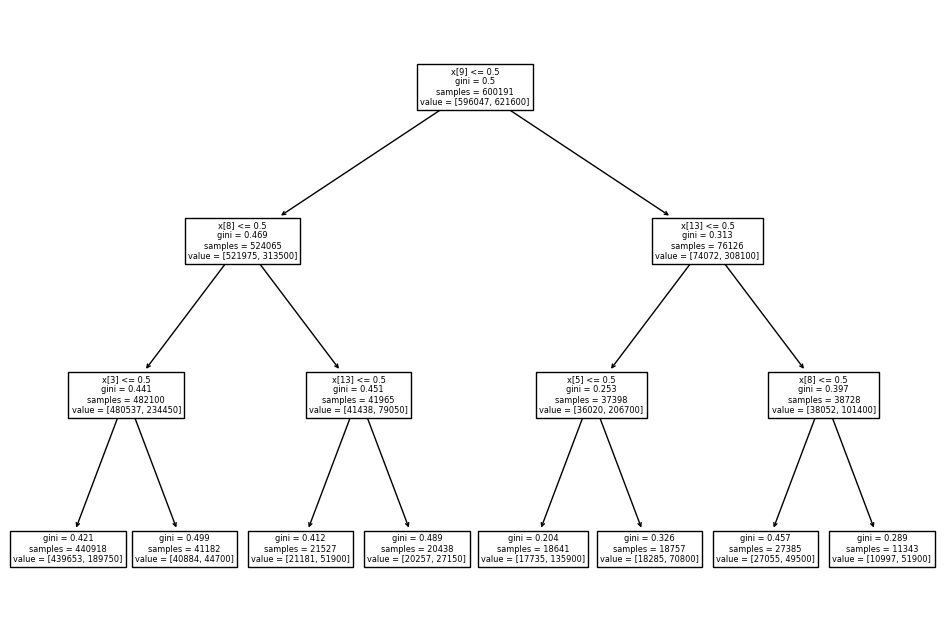

In [17]:
plt.figure(figsize = (12,8))
tree.plot_tree(cls) 

### Grid Search Decision Tree for weigths

In [19]:
w = [{0:1,1:120},{0:1,1:130},{0:1,1:140},{0:1,1:150},{0:1,1:160},{0:1,1:170},{0:1,1:180} ]
hyperparam_grid = {"class_weight": w }

cls = tree.DecisionTreeClassifier(random_state = 13, max_depth = 3)

grid = GridSearchCV(cls,hyperparam_grid,scoring="roc_auc", n_jobs=1, refit=True)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.7499721128558432 with param: {'class_weight': {0: 1, 1: 120}}


### Grid Search Decision Tree for weigths + max_depth

In [20]:
w = [{0:1,1:120},{0:1,1:130},{0:1,1:140},{0:1,1:150},{0:1,1:160},{0:1,1:170}]
max_depth_range = np.array([2,3,4,5,6])
hyperparam_grid = {"class_weight": w, "max_depth": max_depth_range}

cls = tree.DecisionTreeClassifier(random_state = 13, max_depth = 3)

grid = GridSearchCV(cls,hyperparam_grid,scoring="roc_auc", n_jobs=1, refit=True)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.762093800179426 with param: {'class_weight': {0: 1, 1: 120}, 'max_depth': 6}


In [21]:
y_pred = grid.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8086383516376713
Confusion Matrix: 
[[206884  48565]
 [   658   1118]]
Area Under Curve: 0.7196941388910725
Recall score: 0.6295045045045045


[Text(0.5, 0.875, 'x[9] <= 0.5\ngini = 0.191\nsamples = 600191\nvalue = [596047, 4972800]'),
 Text(0.25, 0.625, 'x[8] <= 0.5\ngini = 0.285\nsamples = 524065\nvalue = [521975, 2508000]'),
 Text(0.125, 0.375, 'x[3] <= 0.5\ngini = 0.325\nsamples = 482100\nvalue = [480537, 1875600]'),
 Text(0.0625, 0.125, 'gini = 0.348\nsamples = 440918\nvalue = [439653, 1518000]'),
 Text(0.1875, 0.125, 'gini = 0.184\nsamples = 41182\nvalue = [40884, 357600]'),
 Text(0.375, 0.375, 'x[13] <= 0.5\ngini = 0.115\nsamples = 41965\nvalue = [41438, 632400]'),
 Text(0.3125, 0.125, 'gini = 0.092\nsamples = 21527\nvalue = [21181, 415200]'),
 Text(0.4375, 0.125, 'gini = 0.156\nsamples = 20438\nvalue = [20257, 217200]'),
 Text(0.75, 0.625, 'x[13] <= 0.5\ngini = 0.057\nsamples = 76126\nvalue = [74072, 2464800]'),
 Text(0.625, 0.375, 'x[5] <= 0.5\ngini = 0.042\nsamples = 37398\nvalue = [36020, 1653600]'),
 Text(0.5625, 0.125, 'gini = 0.032\nsamples = 18641\nvalue = [17735, 1087200]'),
 Text(0.6875, 0.125, 'gini = 0.061\

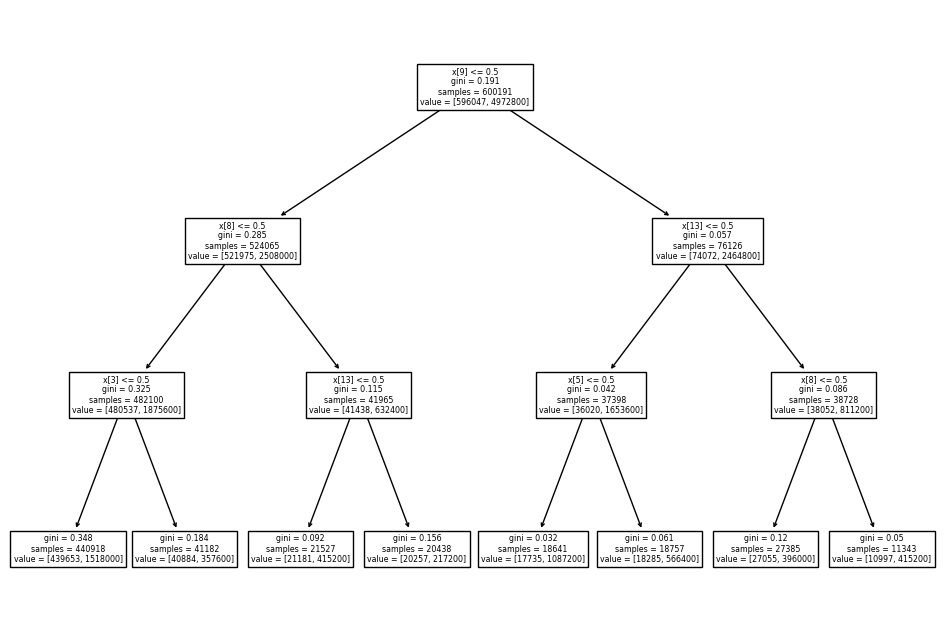

In [22]:
plt.figure(figsize = (12,8))
cls = tree.DecisionTreeClassifier(random_state = 13, max_depth = 3, class_weight = {0: 1, 1: 1200})
cls.fit(X_train, y_train)
tree.plot_tree(cls) 

## Doing a counterfactual of all cases 

### Number of chik and dengue - total

In [23]:
X_lab = df_lab.drop(columns = ['CHIK'])
X_epi = df_epi.drop(columns = ['CHIK'])
y_lab = df_lab['CHIK']
y_epi = df_epi['CHIK']

In [24]:
print('Numbers from SINAN')
print('Dengue total - total: ', np.sum(y_lab == 0) + np.sum(y_epi == 0))
print('Chik total - total: ', np.sum(y_lab == 1) + np.sum(y_epi == 1))

Numbers from SINAN
Dengue total - total:  1754905
Chik total - total:  6495


In [25]:
y_pred_lab = grid.predict(X_lab) 
y_pred_epi = grid.predict(X_epi)

In [26]:
print('Numbers from Model')
print('Dengue total - total: ', np.sum(y_pred_lab == 0) + np.sum(y_pred_epi == 0))
print('Chik total - total: ', np.sum(y_pred_lab == 1) + np.sum(y_pred_epi == 1))

Numbers from Model
Dengue total - total:  1421049
Chik total - total:  340351
